In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##load in dataset
comments_df = pd.read_csv("labeled_comments.csv")

In [4]:
comments_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
comments_df.head()

,comment,labels,scores
0,"Including Tatum here is disgraceful, Haliburto...",negative,0.918116
1,Hali was cooking from the bench. 300 Daps 40 c...,positive,0.970833
2,Hali at least looks happy lol,positive,0.902136
3,"LMAO, sadly that’s what happens when Book/Jrue...",negative,0.495100
4,how tyrese cooking him on the bench,neutral,0.665939


In [6]:
##share of comments by each class
label_counts = comments_df['labels'].value_counts()

In [7]:
label_counts

labels
neutral     471
negative    441
positive    165
Name: count, dtype: int64

<Axes: xlabel='labels'>

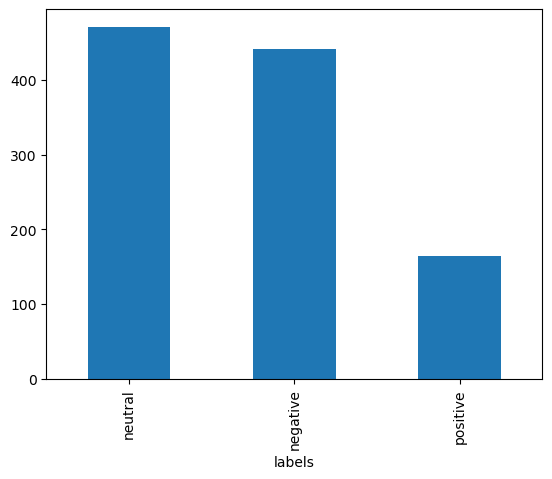

In [8]:
##visualize with bar chart
comments_df['labels'].value_counts().plot(kind='bar')

In [9]:
##create another variable to hold share of total
comments_count = comments_df.shape[0]

In [10]:
label_counts_share = label_counts.div(comments_count)

In [11]:
label_counts

labels
neutral     471
negative    441
positive    165
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x150bd11d0>,
 [Text(0.21518942554323697, 1.0787462681902413, 'neutral'),
  Text(-0.6901307482528052, -0.8565743110297106, 'negative'),
  Text(0.9750319824701565, -0.5092274866504326, 'positive')],
 [Text(0.11737605029631107, 0.5884070553764952, '43.7%'),
  Text(-0.3764349535924391, -0.4672223514707512, '40.9%'),
  Text(0.5318356268019035, -0.2777604472638723, '15.3%')])

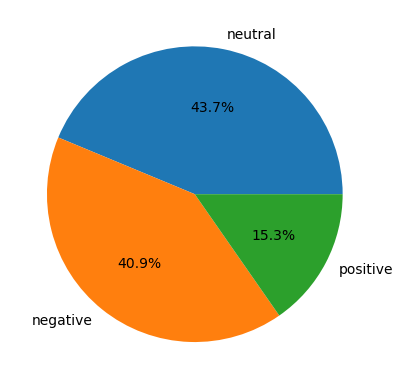

In [12]:
plt.pie(label_counts.values, labels = label_counts.index, autopct='%1.1f%%') ##graph as share of total

In [13]:
##evaluate average confidence of each label(average score per label)
avg_score_per_label = comments_df.groupby('labels')['scores'].mean()

In [14]:
avg_score_per_label ##Neutral comments were the "hardest" to discern, negative and positive had similar confidence scores

labels
negative    0.749978
neutral     0.674199
positive    0.761261
Name: scores, dtype: float64

<BarContainer object of 3 artists>

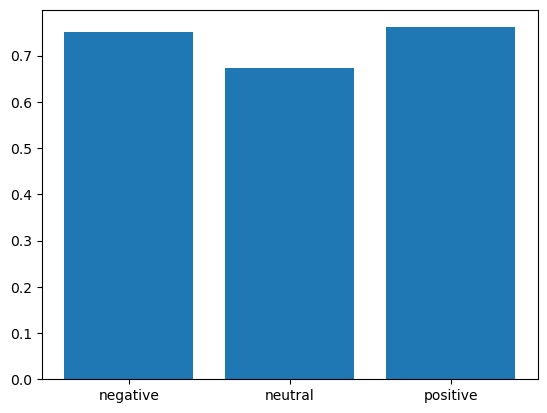

In [15]:
plt.bar(avg_score_per_label.index, avg_score_per_label.values)


In [16]:
#look for keywords in sentiments - build wordcloud
##first - build string of all text based on label
neutral_statements = ' '.join(comments_df[comments_df['labels'] == "neutral"]['comment'])
pos_statements = ' '.join(comments_df[comments_df['labels'] == "positive"]['comment'])
neg_statements = ' '.join(comments_df[comments_df['labels'] == "negative"]['comment'])

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
##want to remove "Tatum" from the generatd text
from wordcloud import STOPWORDS
stop_words = STOPWORDS.update(["Tatum", "Jayson"])

(-0.5, 399.5, 199.5, -0.5)

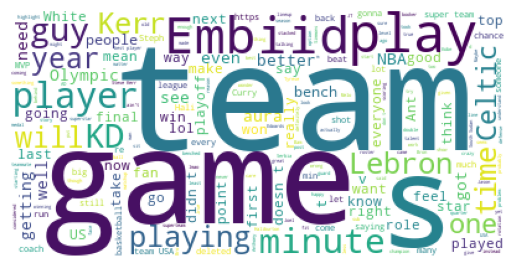

In [19]:
neutral_wc = WordCloud(background_color = "white").generate(neutral_statements)
plt.imshow(neutral_wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

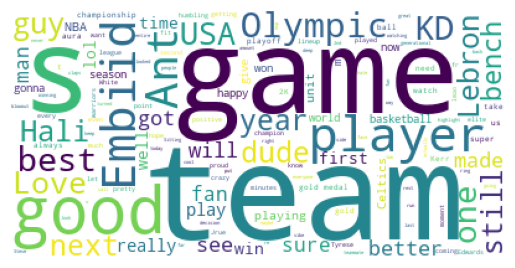

In [20]:
pos_wc = WordCloud(background_color = "white").generate(pos_statements)
plt.imshow(pos_wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

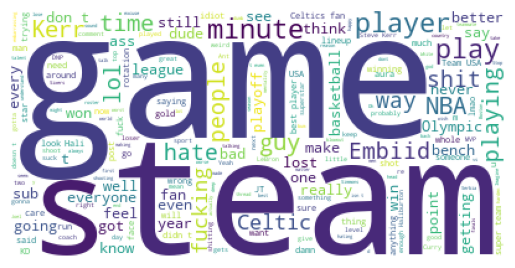

In [21]:
neg_wc = WordCloud(background_color = "white").generate(neg_statements)
plt.imshow(neg_wc)
plt.axis("off")

In [22]:
##get most "important" words in wordcloud
neg_top_twenty = []
for key, value in neg_wc.words_.items():
    if len(neg_top_twenty) < 20:
        neg_top_twenty.append(key)
pos_top_twenty = []
for key, value in pos_wc.words_.items():
    if len(pos_top_twenty) < 20:
        pos_top_twenty.append(key)  
neutral_top_twenty = []
for key, value in neutral_wc.words_.items():
    if len(neutral_top_twenty) < 20:
        neutral_top_twenty.append(key)

In [23]:
##check which words are unique to one category but not the others
def unique_to_list(list_one, list_two):
    uniques = []
    for item in list_one:
        if item not in list_two:
            uniques.append(item)
    return uniques

        

In [25]:
neg_not_pos = unique_to_list(neg_top_twenty, pos_top_twenty)
pos_not_neg = unique_to_list(pos_top_twenty, neg_top_twenty)
neg_not_neut = unique_to_list(neg_top_twenty, neutral_top_twenty)
neut_not_neg = unique_to_list(neutral_top_twenty, neg_top_twenty)
pos_not_neut = unique_to_list(pos_top_twenty, neutral_top_twenty)
neut_not_pos = unique_to_list(neutral_top_twenty, pos_top_twenty)

In [26]:
neg_not_pos ##heavily negative sentiments and curse words

['minute',
 'play',
 'time',
 'NBA',
 'Kerr',
 'hate',
 'playing',
 'people',
 'lol',
 'way',
 'shit',
 'fucking',
 'Celtic']

In [27]:
pos_not_neg ##highly complimentary, mentions lots of other players(might be complimenting them over tatum)

['good',
 'Ant',
 'best',
 'KD',
 'one',
 'Love',
 'USA',
 'Hali',
 'Lebron',
 'dude',
 'still',
 'next',
 'year']

In [28]:
neg_not_neut ##curse words and negative connotations again

['NBA', 'hate', 'people', 'lol', 'way', 'shit', 'fucking']

In [29]:
neut_not_neg ##no connotation

['KD', 'Lebron', 'year', 'will', 'one', 'need', 'getting']

In [30]:
pos_not_neut ##mentions lots of other players again

['good', 'Ant', 'best', 'Love', 'USA', 'Hali', 'dude', 'still', 'next']

In [31]:
neut_not_pos ##buzz words, not many connotations

['play',
 'minute',
 'playing',
 'Kerr',
 'time',
 'will',
 'Celtic',
 'need',
 'getting']